In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

## Notes for group:

- For regression do we only want to use 'response' and year? or include other variables (ie. predict differently for the sources in power generated/consumed or combine all into one prediction?

- For dataframes with month do we include it? or just summarize to a yearly avg

- Some correlation matrices are pretty useless... do we keep all? (I would say yes just to show how year correlates with what we are predicting

- On correlation... some of the correlations between year and predictor are ~0... therefore regression model is ineffective. Anything we want to do about that? (Could be just not regressing for that dataset or including other features). 

- Any other plots to include? Could be something just exploratory (histogram of count, etc.) or something related to regression (residuals, CI, etc)

- What do we want to display to summarize regression models? I was thinking R^2 score and the plot of predictions vs true values. 

### Reading in and viewing all data frames:

In [3]:
earthtemp = pd.read_csv('clean_data/earthtemp.csv', index_col = 0)
earthtemp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Year,Month
2136,2006-01-01,-8.118,0.400,2006,1
2137,2006-02-01,-8.231,0.244,2006,2
2138,2006-03-01,-5.795,0.326,2006,3
2139,2006-04-01,2.137,0.244,2006,4
2140,2006-05-01,6.813,0.342,2006,5


In [4]:
population = pd.read_csv("clean_data/population.csv", index_col = 0)
population.head()

,Region,Municipality,Year,Total,source_x,value_x,sector,source_y,value_y
0,1003,Elkford,2006,"2,545",BIOMASS,10.615334,TOTAL DEMAND,OIL,457.0888
9,1006,Sparwood,2006,"3,736",BIOMASS,10.615334,TOTAL DEMAND,OIL,457.0888
18,1012,Fernie,2006,"4,324",BIOMASS,10.615334,TOTAL DEMAND,OIL,457.0888
27,1022,Cranbrook,2006,"18,791",BIOMASS,10.615334,TOTAL DEMAND,OIL,457.0888
36,1028,Kimberley,2006,"6,283",BIOMASS,10.615334,TOTAL DEMAND,OIL,457.0888


In [5]:
powercons=pd.read_csv('clean_data/powercon.csv', index_col = 0)
powercons.head()

,sector,source,Year,value
1,TOTAL DEMAND,OIL,2006,457.0888
2,TOTAL DEMAND,NATURAL GAS,2007,321.0989
6,TOTAL DEMAND,OIL,2009,430.8465
7,TOTAL DEMAND,BIOMASS,2010,204.5951
8,TOTAL DEMAND,NATURAL GAS,2010,305.5171


In [6]:
powergen = pd.read_csv('clean_data/powergen.csv', index_col = 0)
powergen.head()

,source,Year,value
8,BIOMASS,2006,10.615334
11,NATURAL GAS,2006,8.599036
12,OIL,2006,0.128002
16,BIOMASS,2007,10.615334
19,NATURAL GAS,2007,8.599032


In [7]:
precipitation = pd.read_csv('clean_data/precipitation.csv',index_col = 0)
precipitation.head()

,ONE_DAY_PRECIPITATION,MIN_TEMP,MAX_TEMP,Station,Year,Month
12,5.9,-6.7,-3.7,MIS,2006,1
13,13.8,-7.2,-0.8,MIS,2006,2
14,0.0,-11.4,2.3,MIS,2006,3
15,0.0,-5.9,6.5,MIS,2006,4
16,10.4,-7.1,1.9,MIS,2006,5


## Exploratory Data Analysis:
For our exploratory data analysis we will view the correlations of the features within each dataset.

In [13]:
# some code from: https://seaborn.pydata.org/generated/seaborn.heatmap.html
def plot_corr(df):
    # Parameters: 
    # df: pd.DataFrame -> the dataframe to be plotted
    # returns a seaborn heatmap representing the correlations of the features
    
    sn.heatmap(df.corr(), cmap = 'magma', annot = True)

/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_61979/2213733859.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(), cmap = 'magma', annot = True)


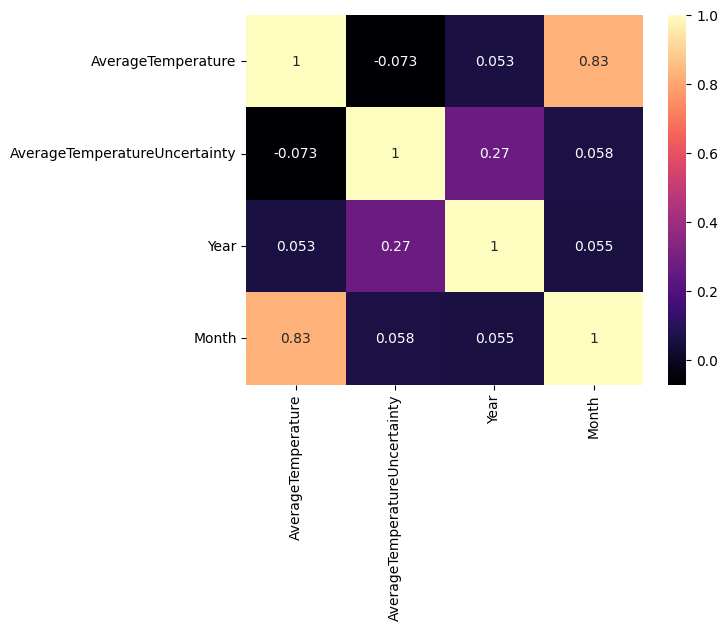

In [14]:
plot_corr(earthtemp)

We see correlation between temperature and month, however there is a near zero correlation between year and temperature. This is about as expected, as we know temperature changes greatly with month. 

/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_61979/2213733859.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(), cmap = 'magma', annot = True)


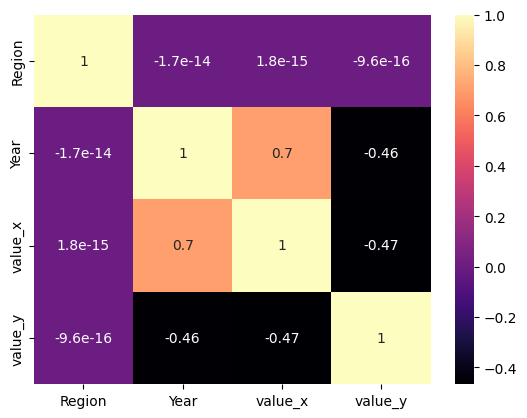

In [15]:
plot_corr(population)

/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_61979/2213733859.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(), cmap = 'magma', annot = True)


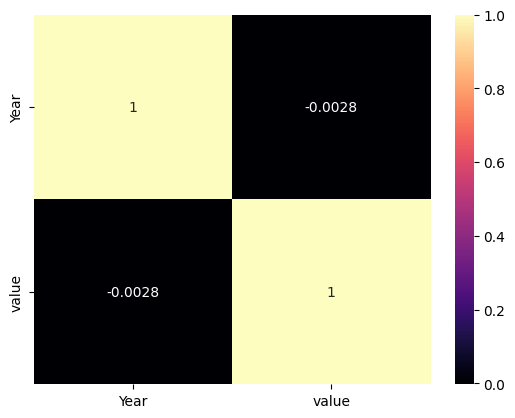

In [16]:
plot_corr(powercons)

/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_61979/2213733859.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(), cmap = 'magma', annot = True)


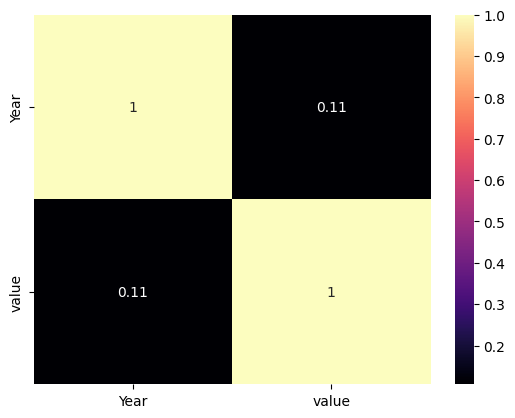

In [17]:
plot_corr(powergen)

/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_61979/2213733859.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(), cmap = 'magma', annot = True)


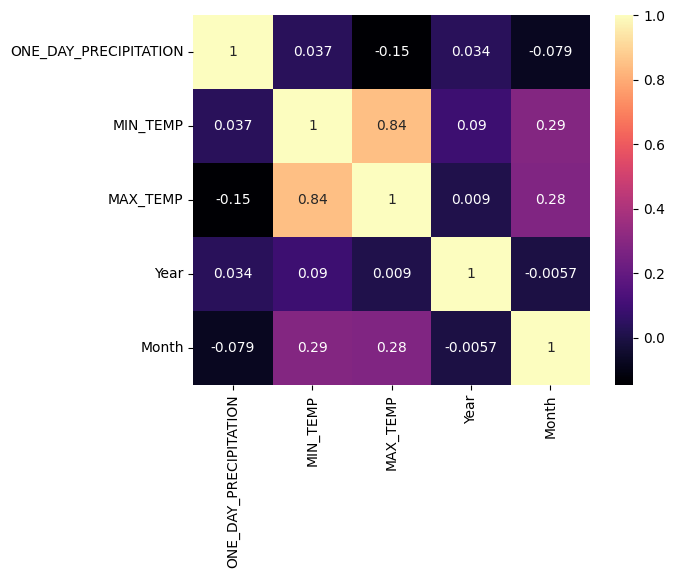

In [18]:
plot_corr(precipitation)

Here we see a meaningful correlation between minimum temperature and maximum temperature. The rest of the dataset provides quite weak correlations besides this. 

# Analysis:
Performing linear regression on each of the data frames and their response variables, and predicting each up to the year 2030. Then we can compare future results to see if the power generated & consumed is truly sustainable. 

In [42]:
# some code from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
def fit_regression_model(data, response):
    # Params: 
    # data: pd.DataFrame -> dataframe to regress on
    # response: string -> the name of the response variable 
    # alpha: float -> the value of alpha to use in the Ridge regressor
    
    # Function fits a Ridge regression model to the specified response from Year, returns the fitted model, 
    # the R^2 score and predictions for the years 2014-2030.
    
    ridge = LinearRegression()
    X = data[['Year']]
    y = data[response]
    ridge.fit(X,y)
    
    score = ridge.score(X,y)
    
    new_years = np.arange(2014, 2035, 1).reshape(-1,1)
    preds = ridge.predict(new_years)
    
    return ridge, score, preds

In [57]:
def plot_old_and_preds(data, preds, model, response):
    # Params:
    # data: pd.DataFrame -> data to plot/predict from
    # preds: np.array -> predictions from previous regression model
    # model: LinearRegression instance -> the model fit to the data
    # response: String -> name of response variable
    
    # Function predicts values for years 2005-2035 using the previously fitted model, then plots the predictions
    # against the true values.
    
    # Returns matplotlib plot
    
    years = np.arange(2005, 2035, 1).reshape(-1,1)
    preds = model.predict(years)
    data_years = data['Year'].values
    data_vals = data[response].values
    
    plt.plot(years, preds, color = 'blue', label = 'Prediction')
    plt.plot(data_years, data_vals, color = 'red', label = 'Real Data')
    plt.xlabel("Year")
    plt.ylabel(response)
    plt.legend()
    
    plt.show()
    

In [58]:
# Fitting temperature model
et_model, et_score, et_preds = fit_regression_model(earthtemp, 'AverageTemperature')
et_preds

/Applications/miniconda3/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.16796519, 2.37656603, 2.58516687, 2.79376772, 3.00236856,
       3.21096941, 3.41957025, 3.6281711 , 3.83677194, 4.04537279,
       4.25397363, 4.46257447, 4.67117532, 4.87977616, 5.08837701,
       5.29697785, 5.5055787 , 5.71417954, 5.92278038, 6.13138123,
       6.33998207])

/Applications/miniconda3/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


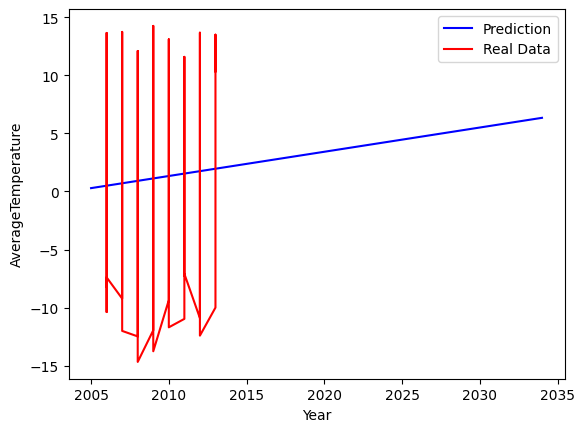

In [59]:
# Plotting temperature model
plot_old_and_preds(earthtemp, et_preds, et_model, 'AverageTemperature')